<center> <span style="color:indigo">Métodos Estadísticos Básicos</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/MCD.jpg" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Unidad 3. Cálculo </span>  </center>
<center> <span style="color:Blue"> M. en C. Iván A. Toledano Juárez </span>  </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
from IPython.display import Image, display
import scipy.stats as stats

%matplotlib inline

## Gráficos de algunas funciones matemáticas

### Ecuación de una recta

Una **recta** en el plano cartesiano puede describirse mediante diferentes formas de ecuación. La más común es la **forma pendiente-intersección**:

\begin{equation}
y = \beta_0 + \beta_1 x 
\end{equation}

donde,

- $y$ es la variable dependiente (ordenada),
- $x$ es la variable independiente (abscisa),
- $\beta_0$ es la **intersección con el eje $y$** (también llamada ordenada al origen).
- $\beta_1$ es la **pendiente** de la recta,

La **pendiente** $\beta_1$ indica qué tanto sube o baja la recta al avanzar una unidad en $x$. Matemáticamente se define como:

\begin{equation}
\beta_1 = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}
\end{equation}

- Si $\beta_1 > 0$, la recta **sube**.
- Si $\beta_1 < 0$, la recta **baja**.
- Si $\beta_1 = 0$, la recta es **horizontal**.

A continuación vamos a graficar una función de este estilo,

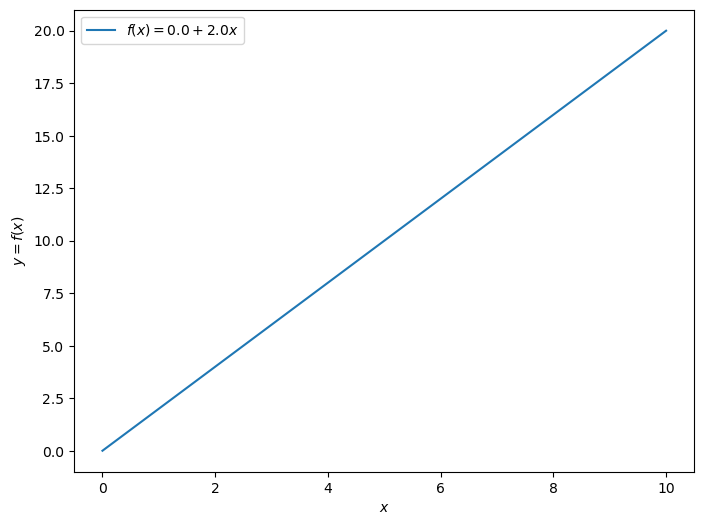

In [2]:
def line(x,beta_0,beta_1):
    function = beta_0 + beta_1*x
    return function

# limites
x_min = 0
x_max = 10
n_points = 100
x = np.linspace(start=x_min, stop=x_max, num=n_points)

# parametros
beta_0 = 0.0
beta_1 = 2.0

fig = plt.figure(figsize=(8.0, 6.0))

ax = fig.add_subplot(111)
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$y=f(x)$')
ax.plot(x,line(x, beta_0, beta_1), label = f'$f(x)={beta_0} + {beta_1} x$')


ax.legend(loc='best')

plt.show()

#### Función Sinusoidal

Una **función sinusoidal** es una función periódica que oscila de forma suave y repetitiva.

\begin{equation}
f(x) = A \cdot \sin(\omega x + \varphi) + D
\end{equation}

Donde:

- **$A$— Amplitud:**  
  Representa la altura máxima de la onda desde su línea media. Controla el "tamaño" vertical de la oscilación.

- **$\omega$ — Frecuencia angular:**  
  Indica cuántas oscilaciones ocurren por unidad de tiempo o espacio. Se relaciona con el período mediante la fórmula:  
  \begin{equation}
  \omega = \frac{2\pi}{T}
  \end{equation}

- **$x$— Variable independiente:**  
  Puede representar tiempo, ángulo, posición espacial, etc., según el contexto del fenómeno.

- **$\varphi$ — Fase inicial (desfase):**  
  Desplaza la onda horizontalmente. Si $\varphi > 0$, la onda se mueve hacia la izquierda; si $\varphi < 0$, hacia la derecha.

- **$D$ — Desplazamiento vertical:**  
  Mueve toda la onda hacia arriba o abajo respecto al eje horizontal. Cambia la línea media de la función.

- **$T$ — Período:**  
  Es el tiempo (o longitud) que tarda la función en completar un ciclo completo. Se calcula como:  
  \begin{equation}
  T = \frac{2\pi}{\omega}
  \end{equation} 

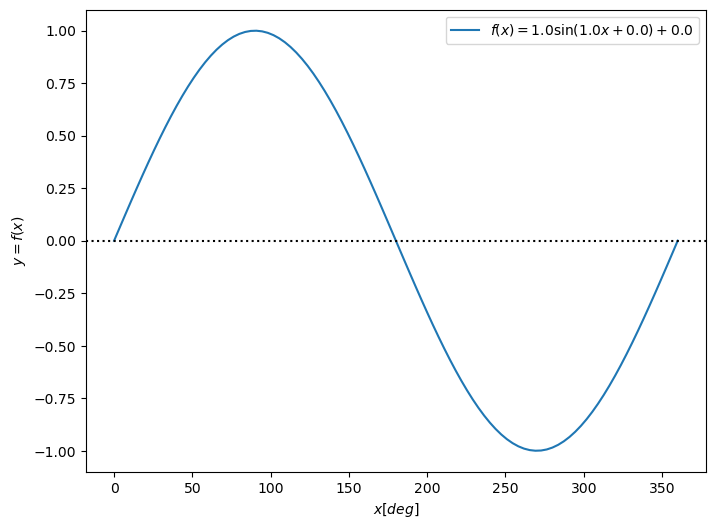

In [3]:
def wave(x,A,omega,phi,D): # entrada en rad
    function = A*np.sin(omega*x + phi) + D
    return function

# limites (en grados)
x_min = 0
x_max = 360
n_points = 100
x = np.linspace(start=x_min, stop=x_max, num=n_points)

# parametros
A = 1.0
omega = 1.0
phi = 0.0
D = 0.0

fig = plt.figure(figsize=(8.0, 6.0))

ax = fig.add_subplot(111)
ax.set_xlabel(f'$x [deg]$')
ax.set_ylabel(f'$y=f(x)$')
ax.plot(x,wave(np.radians(x), A, omega, phi, D), label=f'$f(x)={A} \\sin ({omega} x + {phi}) + {D}$')

ax.axhline(y=0, linestyle='dotted', color='black')
ax.legend(loc='best')

plt.show()

## Derivada de una función matemática

La **derivada** de una función es un concepto fundamental del cálculo diferencial. Representa la **tasa de cambio** de una función respecto a una de sus variables, normalmente \( x \).

Formalmente, la derivada de una función $f(x)$ se define como el límite:

\begin{equation}
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
\end{equation}

Nos dice qué tan rápidamente cambia el valor de la función $f(x)$ cuando $x$ cambia en una pequeña cantidad $h$.

### Interpretación geométrica

La derivada en un punto $x = a$ representa la **pendiente de la recta tangente** a la curva $f(x)$ en ese punto. Es decir:

- Si $f'(a) > 0$, la función **está creciendo** en $x = a$,
- Si $f'(a) < 0$, la función **está decreciendo**,
- Si $f'(a) = 0$, puede haber un **máximo, mínimo o punto de inflexión**.

### Notaciones comunes

- $f'(x)$: Notación de **Lagrange**.
- $\frac{dy}{dx}$: Notación de **Leibniz**, útil cuando se usa \( y = f(x) \).


### Algunas derivadas importantes y reglas generales

Algunas derivadas importantes y reglas generales:

- $\frac{d}{dx}(c) = 0$, donde $c$ es constante.
- $\frac{d}{dx}(x^n) = nx^{n-1}$
- Regla de la suma:  
  $$
  \frac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)
  $$
- Regla del producto:  
  $$
  \frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x)
  $$
- Regla del cociente:  
  $$
  \frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{f'(x)g(x) - f(x)g'(x)}{[g(x)]^2}
  $$
- Regla de la cadena:  
  $$
  \frac{d}{dx}f(g(x)) = f'(g(x)) \cdot g'(x)
  $$

### Aplicaciones de la derivada

- Encontrar **máximos y mínimos** de funciones (optimización),
- Analizar **crecimiento o decrecimiento** de una función,
- Calcular **velocidad instantánea** (física),
- Determinar **pendientes de curvas** (geometría),
- Estudiar **modelos de cambio** en economía, biología y otras áreas. Ecuaciones diferenciales.

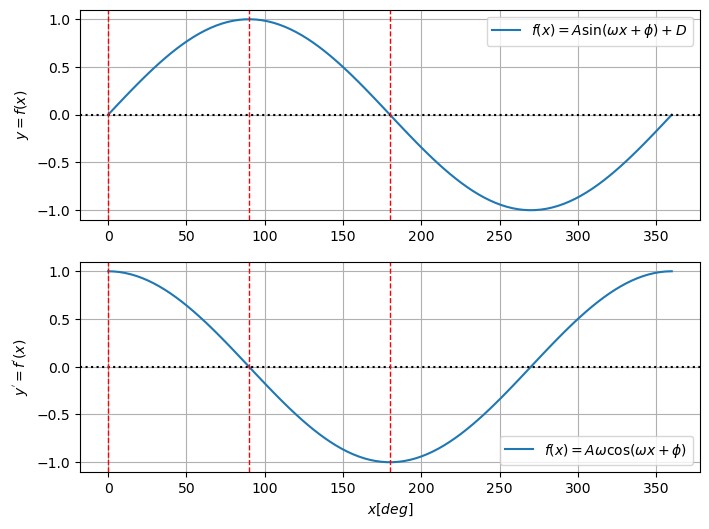

In [4]:
def wave(x,A,omega,phi,D): # entrada en rad
    function = A*np.sin(omega*x + phi) + D
    return function

def wave_derivative(x,A,omega,phi): # entrada en rad
    function = A*omega*np.cos(omega*x + phi)
    return function

# limites (en grados)
x_min = 0
x_max = 360
n_points = 100
x = np.linspace(start=x_min, stop=x_max, num=n_points)

# parametros
A = 1.0
omega = 1.0
phi = 0.0
D = 0.0

fig = plt.figure(figsize=(8.0, 6.0))

# panel superior
ax1 = fig.add_subplot(211)
ax1.set_xlabel(f'$x [deg]$', alpha=0)
ax1.set_ylabel(f'$y=f(x)$')
ax1.grid(True)
ax1.plot(x,wave(np.radians(x), A, omega, phi, D), label=f'$f(x)=A \\sin (\\omega x + \\phi) + D$')

ax1.axhline(y=0, linestyle='dotted', color='black')
ax1.legend(loc='best')

# panel inferior
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.set_xlabel(f'$x [deg]$')
ax2.set_ylabel(r"$y^{'}=f^{'}(x)$")
ax2.grid(True)
ax2.plot(x,wave_derivative(np.radians(x), A, omega, phi), label=f'$f(x)=A \omega \\cos (\\omega x + \\phi)$')

ax2.axhline(y=0, linestyle='dotted', color='black')
ax2.legend(loc='best')

# Líneas verticales conectando puntos clave
for xi in [0, 90, 180]:
    ax1.axvline(x=xi, color='red', linestyle='--', linewidth=1)
    ax2.axvline(x=xi, color='red', linestyle='--', linewidth=1)

plt.show()

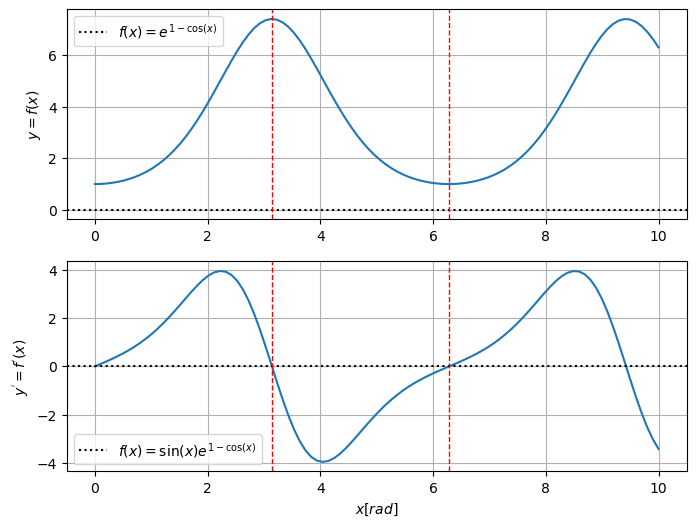

In [5]:
def funcion(x):
    res = np.exp(1.0 - np.cos(x))
    return res

def derivada(x):
    res = np.sin(x)*np.exp(1.0 - np.cos(x))
    return res

# limites (en rad)
x_min = 0
x_max = 10.0
n_points = 100
x = np.linspace(start=x_min, stop=x_max, num=n_points)

# parametros


fig = plt.figure(figsize=(8.0, 6.0))

# panel superior
ax1 = fig.add_subplot(211)
ax1.set_xlabel(f'$x [rad]$', alpha=0)
ax1.set_ylabel(f'$y=f(x)$')
ax1.grid(True)
ax1.plot(x,funcion(x))

ax1.axhline(y=0, linestyle='dotted', color='black', label=r'$f(x)=e^{1-\cos(x)}$')
ax1.legend(loc='best')

# panel inferior
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.set_xlabel(f'$x [rad]$')
ax2.set_ylabel(r"$y^{'}=f^{'}(x)$")
ax2.grid(True)
ax2.plot(x,derivada(x))

ax2.axhline(y=0, linestyle='dotted', color='black', label=r'$f(x)=\sin(x)e^{1-\cos(x)}$')
ax2.legend(loc='best')

#Líneas verticales conectando puntos clave
for xi in [np.pi, 2.0*np.pi]:
    ax1.axvline(x=xi, color='red', linestyle='--', linewidth=1)
    ax2.axvline(x=xi, color='red', linestyle='--', linewidth=1)

plt.show()

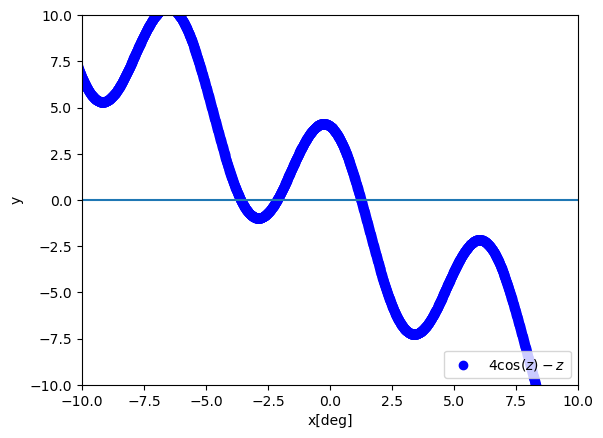

In [6]:
x = np.arange(-100,100,0.01)

y=[]
for i in range(0,len(x)):
    y.append(4.*np.cos(x[i]) - x[i])

dy=[]
for i in range(0,len(x)):
    dy.append(3.0*x[i]**2. + 4.*x[i]**1.)


plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(x,y,c='blue',label=r'$4 \cos(z) - z$')
#plt.scatter(x,dy,c='black',label=r'$df(x)=3x^2 + 4x$')
plt.xlabel('x[deg]')
plt.ylabel('y')
plt.axhline(y=0)
plt.legend(loc='lower right')
#plt.savefig('derivada_sin.pdf', bbox_inches='tight')
plt.show()

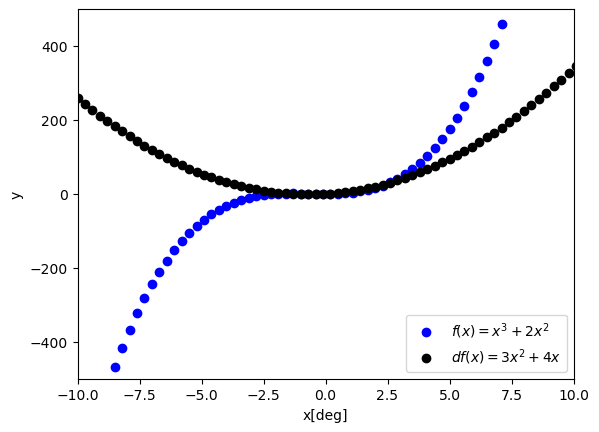

In [7]:
x = np.arange(-100,100,0.3)

y=[]
for i in range(0,len(x)):
    y.append(x[i]**3. + 2.*x[i]**2.)

dy=[]
for i in range(0,len(x)):
    dy.append(3.0*x[i]**2. + 4.*x[i]**1.)


plt.xlim(-10,10)
plt.ylim(-500,500)
plt.scatter(x,y,c='blue',label=r'$f(x)=x^3 + 2x^2$')
plt.scatter(x,dy,c='black',label=r'$df(x)=3x^2 + 4x$')
plt.xlabel('x[deg]')
plt.ylabel('y')
plt.legend(loc='lower right')
#plt.savefig('derivada_sin.pdf', bbox_inches='tight')
plt.show()

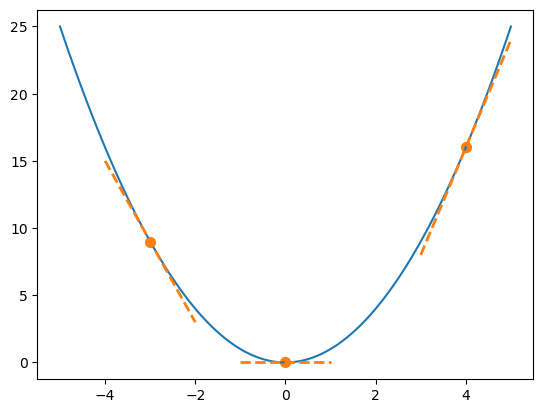

In [8]:
# Definir función
def f(x): 
    return x**2

# Definir derivada de la función
def slope(x): 
    return 2*x

# Definir un rango de x
x = np.linspace(-5,5,100)

# Escoger un punto donde se pondrá la recta tangente
x1 = -3
y1 = f(x1)

x2 = 0
y2 = f(x2)

x3 = 4.0
y3 = f(x3)

# definir la funcion de recta tangente
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
xrange = np.linspace(x1-1, x1+1, 10)
x2range = np.linspace(x2-1, x2+1, 10)
x3range = np.linspace(x3-1, x3+1, 10)

# Plot the figure
plt.figure()
plt.plot(x, f(x))
plt.scatter(x1, y1, color='C1', s=50)
plt.scatter(x2, y2, color='C1', s=50)
plt.scatter(x3, y3, color='C1', s=50)
plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2)
plt.plot(x2range, line(x2range, x2, y2), 'C1--', linewidth = 2)
plt.plot(x3range, line(x3range, x3, y3), 'C1--', linewidth = 2)
plt.show()

## Ecuaciones Diferenciales Ordinarias (EDO)

Una **ecuación diferencial ordinaria (EDO)** es una ecuación que relaciona una función desconocida $y(x)$ con sus derivadas respecto a una única variable independiente $x$. Estas ecuaciones aparecen en una gran variedad de contextos, como física, biología, economía, ingeniería y ciencia de datos.

---

### Definición general

Una EDO tiene la forma:

$$
F\left(x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, \dots, \frac{d^n y}{dx^n} \right) = 0
$$

Donde:

- $y = y(x)$ es la función desconocida.
- $\frac{dy}{dx}$, $\frac{d^2y}{dx^2}$, etc., son derivadas de $y$.
- $n$ es el **orden** de la ecuación (la mayor derivada que aparece).

---

### Tipos de EDO

- **Primer orden**: involucra solo la primera derivada, $\frac{dy}{dx}$.
- **Orden superior**: involucra derivadas de segundo orden o mayores.

Según su linealidad:

- **Lineales**: la función y sus derivadas aparecen con exponente 1 y no multiplicadas entre sí.
- **No lineales**: cualquier otro caso.

La función `odeint` del módulo `scipy.integrate` permite resolver ecuaciones diferenciales ordinarias **de primer orden o sistemas de ellas** de forma numérica.

Este modulo trabaja de la siguiente forma;

\begin{equation}
y = {\rm odeint}({\rm model},y_0, t)
\end{equation}

* **model**: la función que regresa el valor $\frac{dy}{dt}$
* $y_0$: condiciones iniciales

In [9]:
from scipy.integrate import odeint


Tomemos la siguiente ecuacion diferencial parcial:

\begin{equation}
\frac{dy(t)}{dt} = -k y(t)
\end{equation}


In [10]:
def model(y,t):
    k = 0.5
    dydt = -k * y
    return dydt


#condicion inicial
y0 = 2

## el numero de puntos a sondear
t = np.linspace(0,4,100) ### meses

In [11]:
# Resolver la EDO
# Lo guarda en la variable y

y = odeint(model,y0,t)

Text(0, 0.5, '$y(t)$')

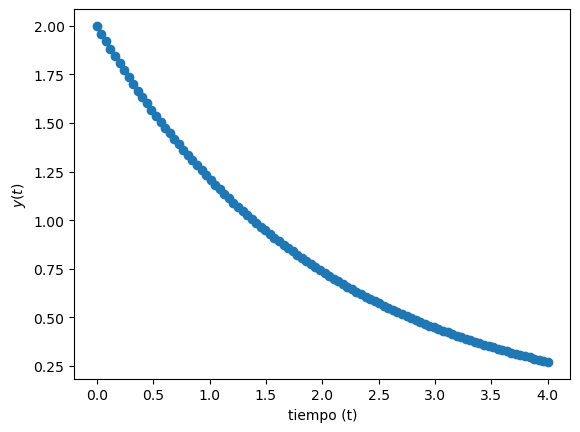

In [12]:
# Graficar el resultado

plt.scatter(t,y)
plt.xlabel('tiempo (t)')
plt.ylabel(r'$y(t)$')

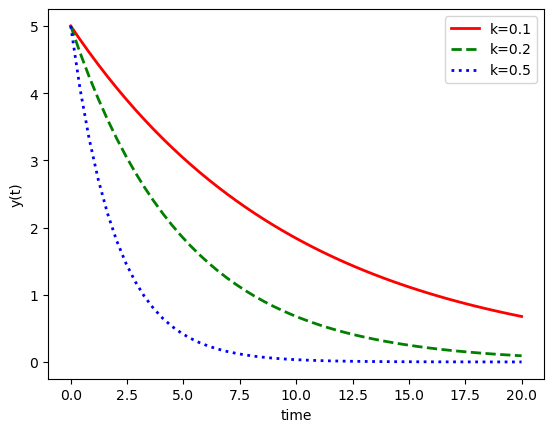

In [13]:
## Se puede agregar un argumento extra en la función

def model(y,t,k):
    dydt = -k * y
    return dydt

# Condicion inicial
y0 = 5

# numero de puntos del tiempo
t = np.linspace(0,20)

# Resolver EDO para diferentes valores de k
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'g--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'b:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

**Ejercicio**: Resolver para $x(t)$ y $y(t)$ y mostrar que son la misma:

* $\frac{dx(t)}{dt} = 3 e^{-t}$
* $\frac{dy(t)}{dt} = 3 - y(t)$

## Simulación de infección por VIH

La infección por virus de inmunodeficiencia humana (VIH) se propaga y puede convertirse en síndrome de inmudeficiencia adquirida. Sin tratamiento con medicamentos antiretrovirales, el tiempo de supervivencia después de la infección por el VIH es de unos 9 a 11 años. La OMS recomienda medicamentos antiretrovirales tan pronto como se diagnostica la infección por VIH. En esa simulación de ejemplo se mide la propagación de la infección por VIH en un cuerpo con una infección inicial.

**Ecuaciones**

Se utilizan ecuaciones de balance transitorio en el número de células saludables ($H$), células infectadas ($I$), y conteo de virus ($V$). Términos positivos corresponden a un incremento en el conteo, y viceversa.

\begin{equation}
\frac{dH(t)}{dt} = k_1 - k_2 H(t) - k_3 H(t) V(t)
\end{equation}

\begin{equation}
\frac{dI(t)}{dt} = k_3 H(t) V(t) - k_4 I(t) 
\end{equation}

\begin{equation}
\frac{dV(t)}{dt} = -k_3 H(t) V(t) - k_5V(t) + k_6 I(t)
\end{equation}

**Parámetros**

* $k_1$ = 1e05, células saludables nuevas por año
* $k_2$ = 0.1, taza de muerte de células saludables
* $k_3$ = 2e-07, células saludables que se conviertes en células infectadas
* $k_4$ = 0.5, muerte de células infectadas
* $k_5$ = 5, taza de muerte del virus
* $k_6$ = 100, producción de virus por células infectadas

**Interpretación de parámetros (tiempo en años)**

* **dH/dt**: nuevas células por año, la taza de muerte de las células saludables (10% por año), células que se convierte de saludables a infectadas (entre más virus y más saludables tienen, más incremental el conteo de infectadas)

* **dI/dt**: Células que se convierten de saludables a infectadas (incrementan conteo), la taza de muerte de células infectadas (50% por año)

* **dV/dt**: conteo negativo al infectar una celula saludable, taza de muerte de virus, cada años las celulas infectadas incrementa el conteo por 100 por conteo de I(t).


**Condiciones Iniciales**

* $H(0)$ = 1e06
* $I(0)$ = 0
* $V(0)$ = 100


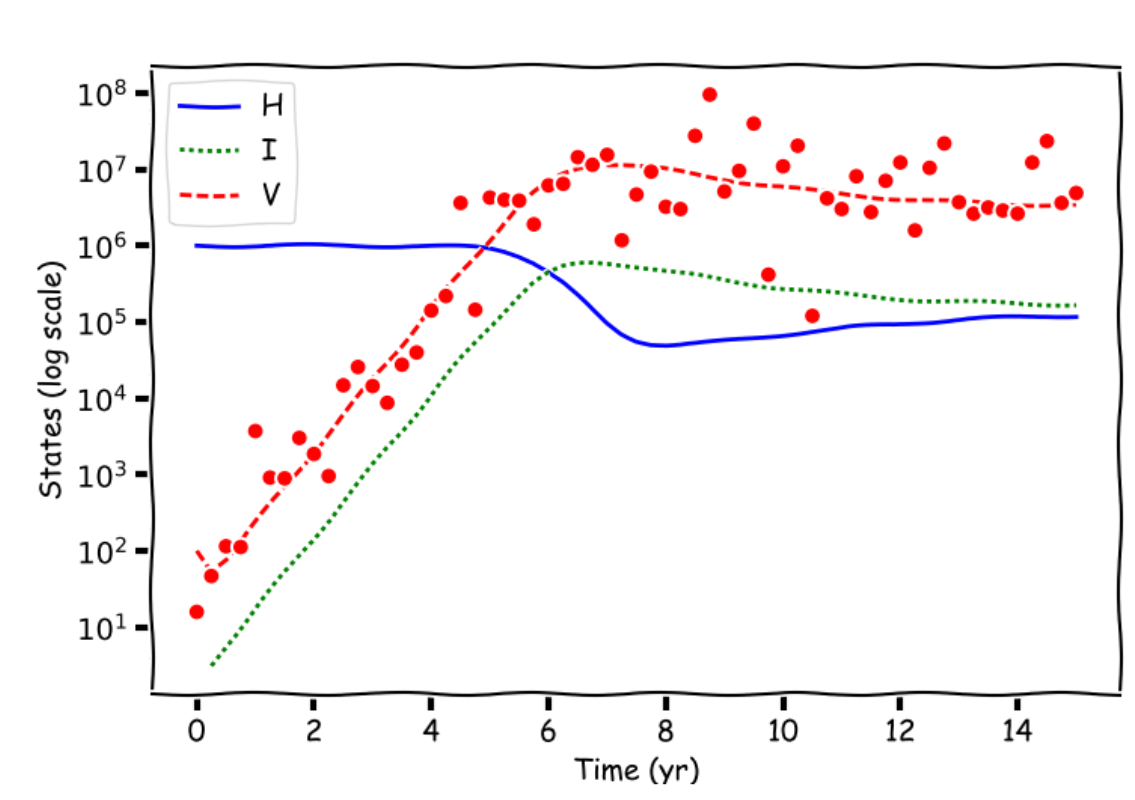

In [14]:
Image(filename = "../Imagenes/VIH_DE.png")

In [15]:
### Definir el modelo

def hiv(x,t):
    k1 = 1e05
    k2 = 0.1
    k3 = 2e-07
    k4 = 0.5
    k5 = 5
    k6 = 100
    
    h = x[0]
    i = x[1]
    v = x[2]
    
    p = k3*h*v
    
    dhdt = k1 - k2*h - p
    didt = p - k4*i
    dvdt = -p - k5*v + k6*i
    
    return [dhdt,didt, dvdt]

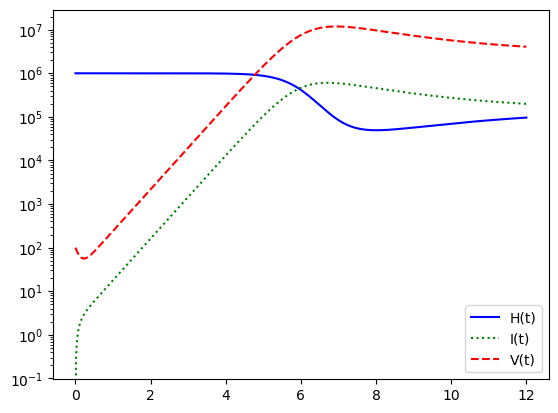

In [16]:
## Valores iniciales
x0 = [1e06, 0, 100]

## Hacemos una lista de valores (t en unidades de años)
t = np.linspace(0,12,1000) 

# Se tiene numéricamente la derivada
x = odeint(hiv,x0,t)

# Se guardan los resultados de la lista
h = x[:,0]
i = x[:,1]
v = x[:,2]

# Se grafican los resultados en una escala logaritmica

plt.semilogy(t,h, color = 'blue', label = 'H(t)', linestyle='solid')
plt.semilogy(t,i, color = 'green', label = 'I(t)', linestyle='dotted')
plt.semilogy(t,v, color = 'red', label = 'V(t)', linestyle='dashed')
plt.legend()
plt.show()



**Ecuaciones**

\begin{equation}
\frac{dH(t)}{dt} = k_1 - k_2 H(t) - k_3 H(t) V(t)
\end{equation}

\begin{equation}
\frac{dI(t)}{dt} = k_3 H(t) V(t) - k_4 I(t) 
\end{equation}

\begin{equation}
\frac{dV(t)}{dt} = -k_3 H(t) V(t) - k_5V(t) + k_6 I(t) - k_7 AV(t)
\end{equation}

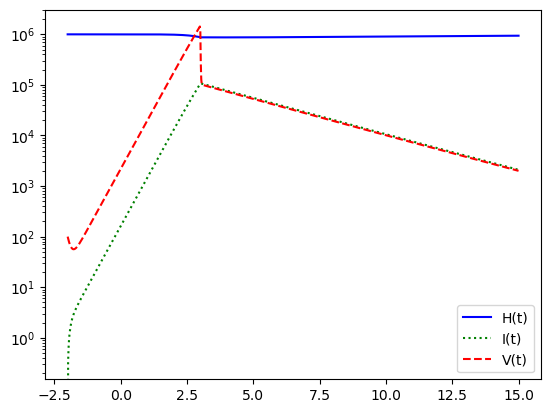

In [17]:
### Definir el modelo

def hiv(x,t):
    k1 = 1e05
    k2 = 0.1
    k3 = 2e-07
    k4 = 0.5
    k5 = 5
    k6 = 100
    k7 = 1.0
    
    if t > 3.0:
        A = 100.0
    else:
        A = 0.0
    
    h = x[0]
    i = x[1]
    v = x[2]
    
    p = k3*h*v
    
    dhdt = k1 - k2*h - p
    didt = p - k4*i
    dvdt = -p - k5*v + k6*i - k7*A*v
    
    return [dhdt,didt, dvdt]

## Valores iniciales
x0 = [1e06, 0, 100]

## Hacemos una lista de valores (t en unidades de años)
t = np.linspace(-2,15,1000) 

# Se tiene numéricamente la derivada
x = odeint(hiv,x0,t)

# Se guardan los resultados de la lista
h = x[:,0]
i = x[:,1]
v = x[:,2]

# Se grafican los resultados en una escala logaritmica

plt.semilogy(t,h, color = 'blue', label = 'H(t)', linestyle='solid')
plt.semilogy(t,i, color = 'green', label = 'I(t)', linestyle='dotted')
plt.semilogy(t,v, color = 'red', label = 'V(t)', linestyle='dashed')
plt.legend()
plt.show()

## Integrales

La **integración** es una operación matemática fundamental que permite calcular áreas bajo curvas, acumulación de cantidades, desplazamientos, y muchas otras magnitudes en distintos contextos físicos, económicos y probabilísticos.

Intuitivamente, una **integral definida** representa el **área bajo la curva** de una función $f(x)$ en un intervalo $[a, b]$.

$$
\int_a^b f(x) \, dx
$$

Esta expresión se lee como: “la integral de $f(x)$ desde $a$ hasta $b$ con respecto a $x$”.

### Tipos de integrales

- **Integral definida**: calcula el área (o acumulado) entre dos puntos $a$ y $b$:

$$
\int_a^b f(x)\, dx
$$

- **Integral indefinida**: representa una **familia de funciones primitivas**, es decir, funciones cuya derivada es $f(x)$:

$$
\int f(x)\, dx = F(x) + C
$$

Donde $C$ es la **constante de integración**.


### Relación con la derivada (Teorema Fundamental del Cálculo)

Si $F(x)$ es una función tal que $F'(x) = f(x)$, entonces:

$$
\int_a^b f(x) \, dx = F(b) - F(a)
$$


### Aplicaciones comunes

- **Probabilidades acumuladas** en funciones de densidad.
- **Esperanza matemática** en estadística.
- Modelado de **crecimiento continuo o procesos acumulativos**.

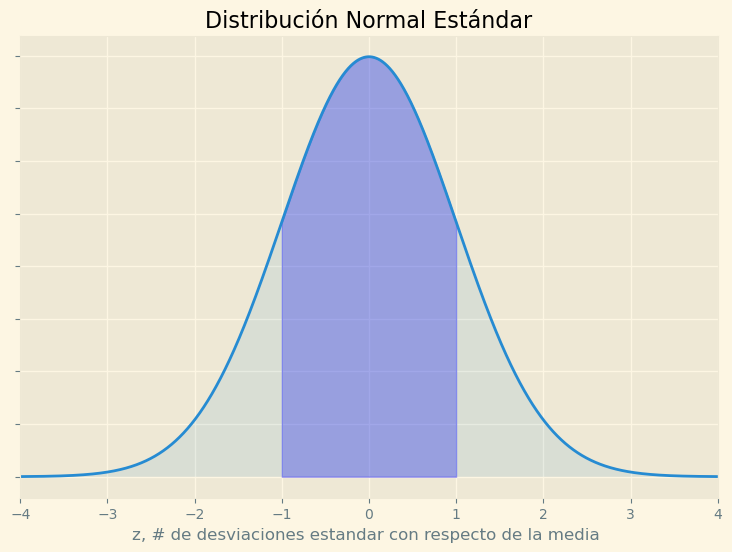

Area bajo la curva = 0.6826894921370859


In [19]:
# Definir constantes
mu = 998.8 # media
sigma = 73.10 # desviacion estandar
x1 = 900 # limite inferior
x2 = 1100 # limite superior

# Transformacion en z-values
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

z1 = -1.0
z2 = 1.0

x = np.arange(z1, z2, 0.001) # se genera una lista con puntos entre estos dos valores, para el area marcada
x_all = np.arange(-10, 10, 0.001) # lista de valores donde se va a graficar toda la curva de Gauss

# Utiliando z-values, la distribucion es estándar, aqui utilizamo la funcion norm
y = stats.norm.pdf(x,0,1)
y2 = stats.norm.pdf(x_all,0,1)

# Graficar
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('Solarize_Light2')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('z, # de desviaciones estandar con respecto de la media ')
ax.set_yticklabels([])
ax.set_title('Distribución Normal Estándar')

plt.show()

print('Area bajo la curva =',stats.norm.cdf(z2) - stats.norm.cdf(z1))